In [ ]:
#imports we have already seen
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#new imports we will learn to use
import statsmodels.api as sm # for the statistical analysis to find out if the TS is stationary
import glob #to sort files
from pandas.plotting import scatter_matrix #will make useful correlatin plots
import json #reads and writes json files, see programmatic data access notebooks
import os #this runs system level commands, see programmatic data access notebooks

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#some annoying wornings show up - suppress them with this
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

# data ingestion

use kaggle economic data accessing it programmatically at
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt

Access it programmatically as was done for the TESLA data in https://github.com/fedhere/MLTSA22_FBianco/blob/main/Lab3ProgrammaticDataAccess/Kaggledata_load.ipynb

Save it in a directory called MLTSA22/HW2/data in your google drive 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# I had to restart the runtime so these just returned errors lol
mkdir MLTSA22

mkdir: cannot create directory ‘MLTSA22’: File exists


In [ ]:
cd MLTSA22

/content/drive/MyDrive/MLTSA22


In [ ]:
mkdir HW2

mkdir: cannot create directory ‘HW2’: File exists


In [ ]:
cd HW2

/content/drive/MyDrive/MLTSA22/HW2


In [ ]:
mkdir Data

mkdir: cannot create directory ‘Data’: File exists


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import json
import os
envs = json.load(open(".kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
cd MLTSA22/HW2/Data

/content/drive/MyDrive/MLTSA22/HW2/Data


In [ ]:
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# didn't run this again when I restarted the runtime because it is uh already there
!unzip price-volume-data-for-all-us-stocks-etfs.zip

In [ ]:
ls /content/drive/MyDrive/MLTSA22/HW2/Data

Data/  ETFs/  MLTSA22/  price-volume-data-for-all-us-stocks-etfs.zip  Stocks/


In [ ]:
#use glob.glob to list the files in Data/Stocks. 
#This command returns a list, turn it into an array with np.array(<list>)
#Sort the array (alphabetically) with np.sort
allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))


# read in the first 10 files in Data/Stock (first in alphabetical order.)

each file can be read with ```pd.read_csv()```

merge each file so that you end up with a single dataframe (e.g. call it tss)

```df1 = pd.read_csv()```

```df2 = pd.read_csv()```

```newdf = df.merge(df2)```

you want to merge on the date: this means the resulting dataframe will have a row for each date that is available in both files and all the columns of the files you are merging. To achieve this pass the argument ```on="Date"``` to ```df.merge()```

I also recommand you turn the Date column into the dataframe index

```tss.set_index("Date", inplace=True)```

In [ ]:
tss = pd.read_csv(allfiles[0])
# maybe not necessary?
tss.sort_values(by="Date")

tss['Date'] = pd.to_datetime(tss['Date'])

In [ ]:
firstfiles = allfiles[1:10]

for f in firstfiles:
  df = pd.read_csv(f)
  name = f.split("/")[-1].replace(".txt","")
  df[name] = df['Close']
  df["Date"] =  pd.to_datetime(df['Date'])
  tss = pd.merge(tss, df[["Date", name]], on="Date")

In [ ]:
tss = tss.drop(["Open", "High", "Low", "Volume","OpenInt"], axis=1)

In [ ]:
tss.set_index("Date", inplace=True)

In [ ]:
tss.rename(columns={"Close":"a.us"},inplace=True)

In [ ]:
tss.head()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [ ]:
tss.tail()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2017-11-02,68.13,47.46,81.00,70.51,10.02,47.257,88.00,3.65,35.80,39.28
2017-11-03,68.37,47.12,80.99,70.23,10.08,47.346,80.40,3.60,36.43,37.82
2017-11-07,68.25,46.97,81.00,72.22,11.07,46.358,81.00,3.40,34.44,37.89
2017-11-09,67.47,43.33,81.00,70.19,10.88,45.670,84.05,3.50,35.62,43.20
2017-11-10,66.81,43.01,80.98,70.56,11.28,45.820,80.10,3.50,36.59,45.30


In [ ]:
tss.shape

(447, 10)

In [ ]:
tss.describe()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,48.787649,28.434510,36.750649,44.218737,13.871387,41.942794,45.783325,3.875367,29.626879,33.240678
std,9.034588,8.818682,10.642928,10.756682,6.071919,6.066181,31.608792,0.432411,7.248519,22.352541
min,34.193000,14.831000,23.720000,26.760000,6.050000,24.916000,11.340000,3.100000,20.203000,8.800000
25%,41.239500,20.950000,29.720000,36.660000,8.040000,37.982500,15.555000,3.562000,23.769500,16.065000
50%,46.228000,28.080000,35.020000,42.080000,11.400000,42.059000,33.650000,3.800000,26.839000,22.870000
75%,55.956500,34.595000,38.525000,49.640000,19.600000,46.530000,76.250000,4.129100,34.966000,52.645000
max,68.370000,50.080000,81.000000,72.220000,24.720000,53.992000,109.350000,4.944600,46.248000,99.610000


#  data inspection

plot each time series (ts)

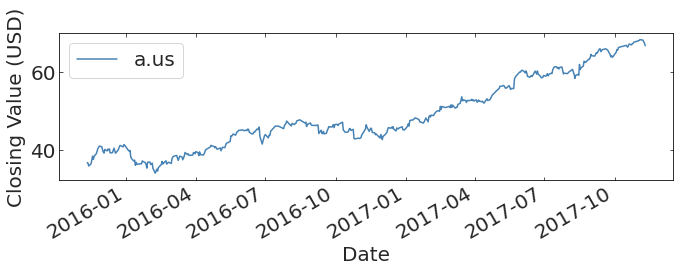

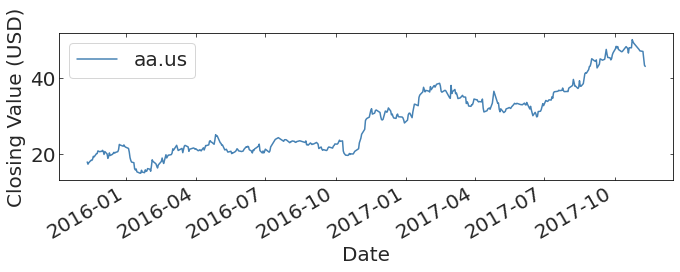

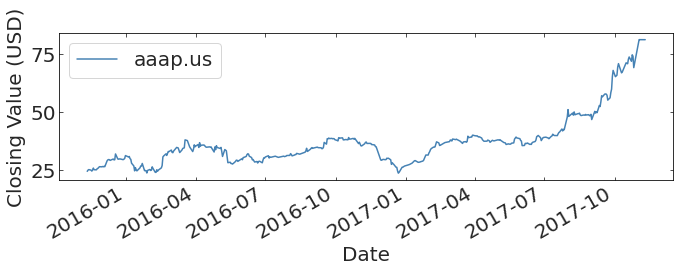

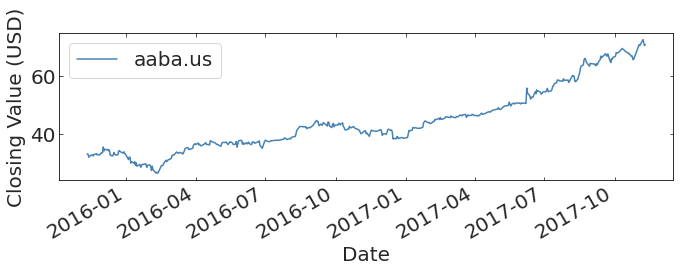

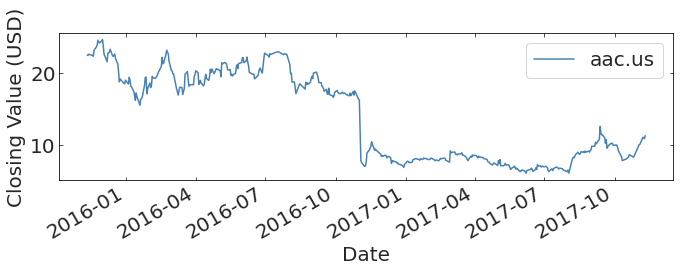

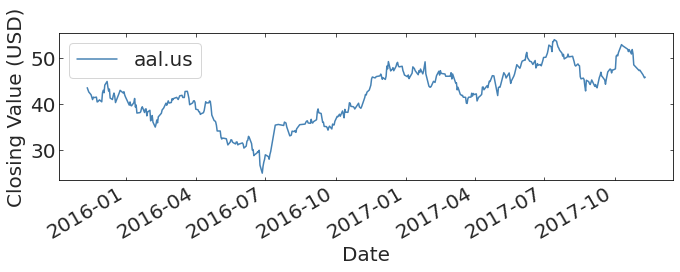

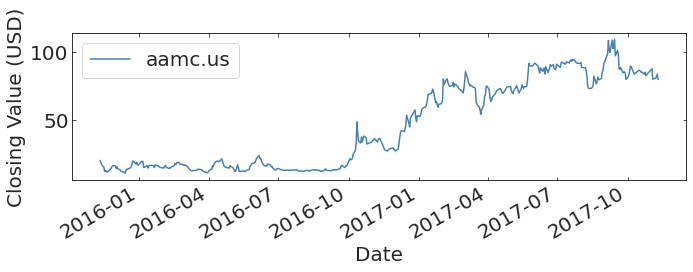

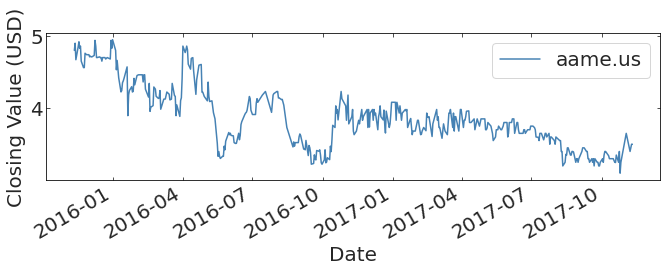

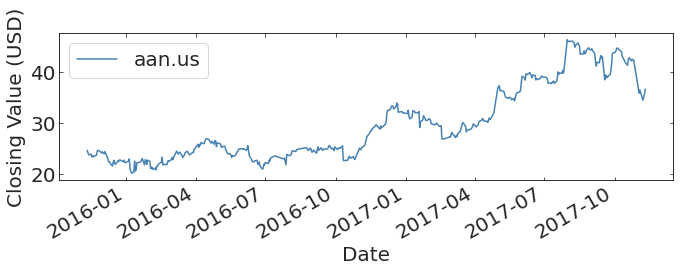

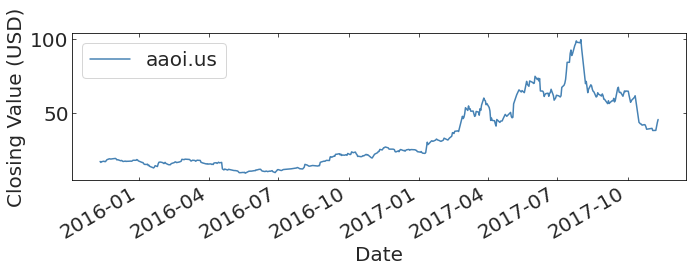

In [ ]:
# plot the 10 time series individually since they are only 10

# sorry, did "indivdually" mean "don't use a loop" because I used a loop 

for col in tss.columns:
  fig, ax = pl.subplots(figsize=(11,3))
  ax.set_ylabel("Closing Value (USD)")
  tss.plot(y=col,use_index=True, ax=ax)

Fig 1: Closing values of first 10 stocks in Kaggle data, between 2015 and 2017.

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


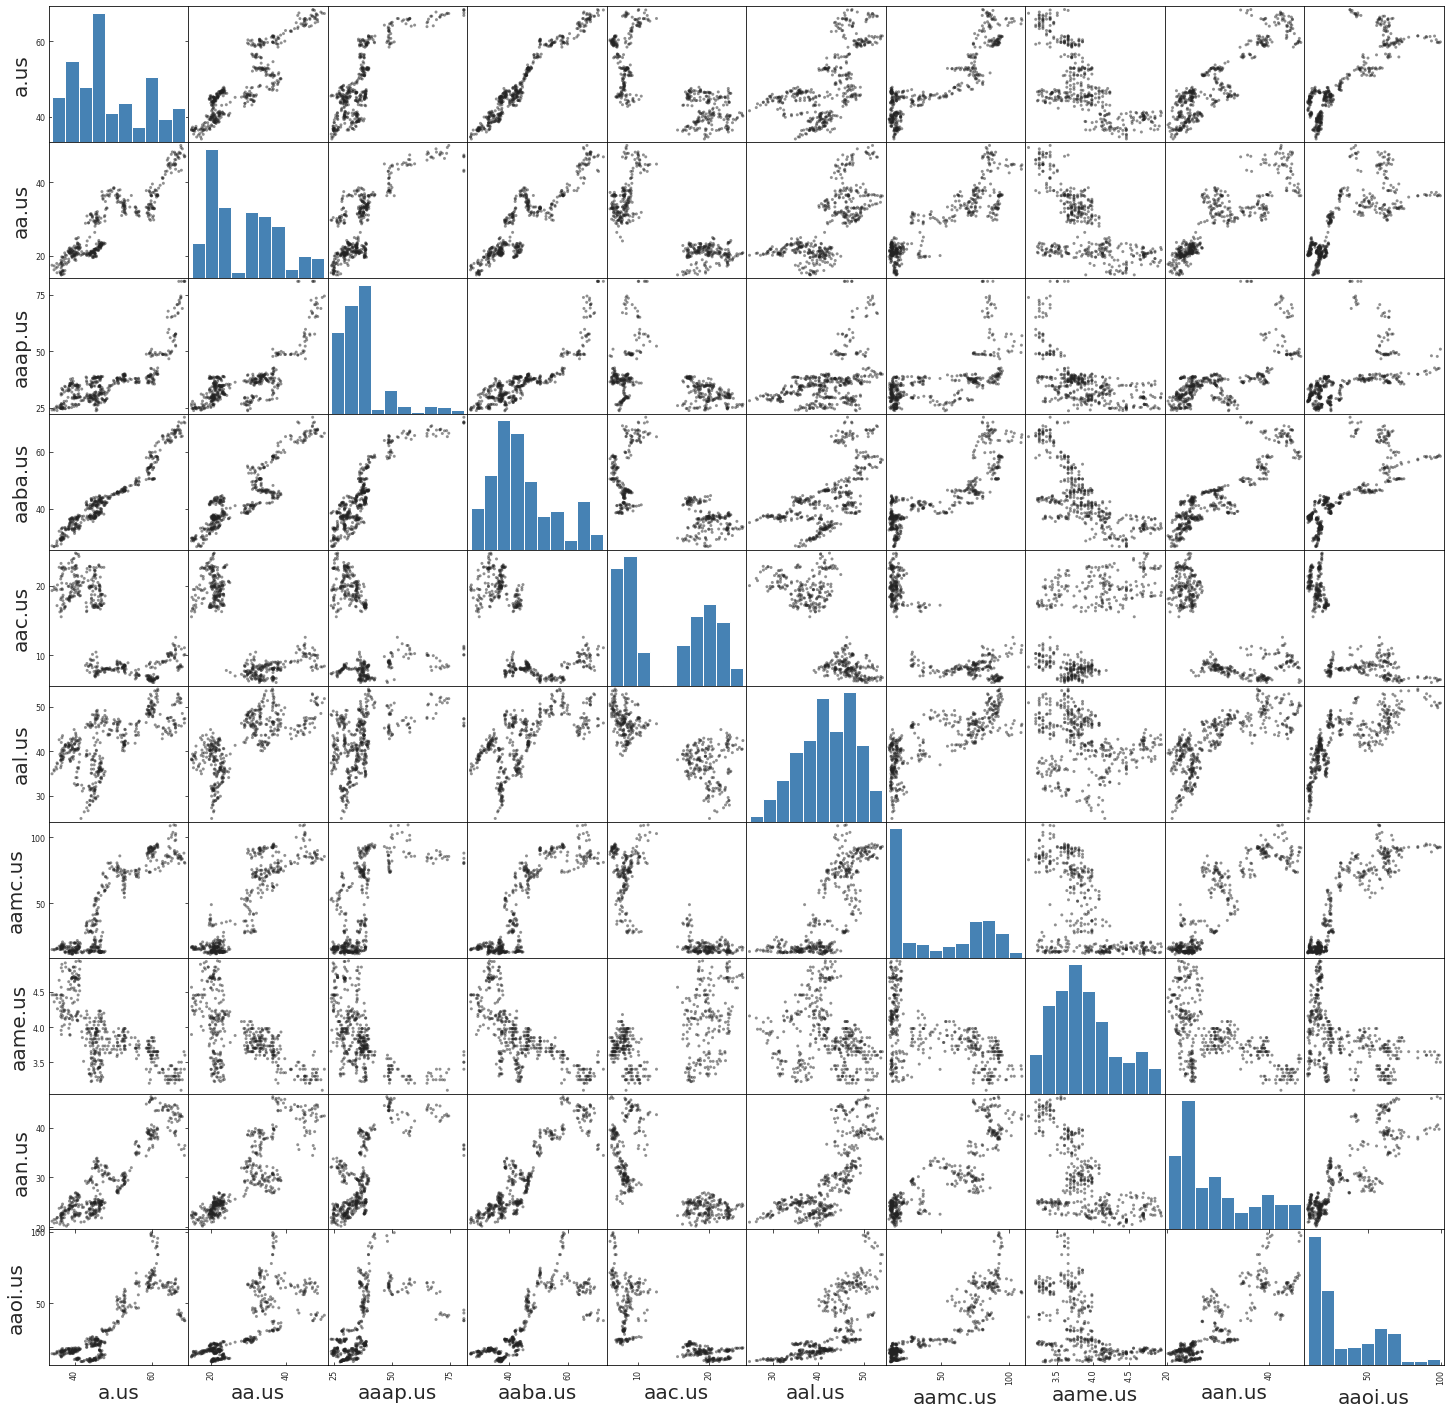

In [ ]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig 2: A series of scatter plots showing our 10 stocks plotted against each other to see if there's any potential correlations. Most of them kind of just look like a mess. Histograms of each stock run diagonally across; aal.us and aame.us seem to be closest to a normal distribution?

In [ ]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


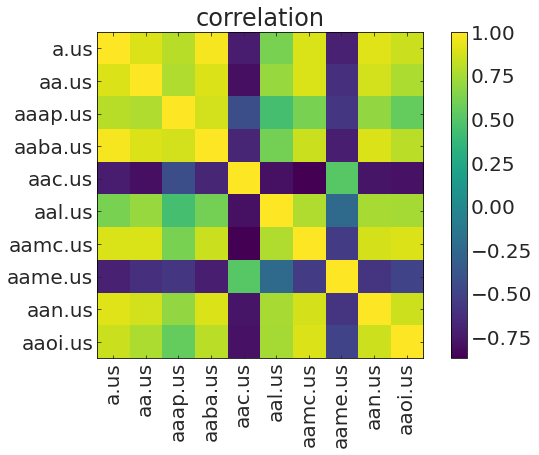

In [ ]:
# you can visualize it as a heat map with imshow
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);


Fig 3: A heat map where colors indicate correlation of the ten stocks when plotted with each other. While aac.us and aame.us have somewhat strong negative correlations with most of the other stocks (though no strong correlation with each other), looking at the scatter plots for both this seems a little generous?

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

You will have to set a statistival threshold - choose 2-sigma. What fraction of a gaussian distribution is not contained inside of 2-sigma? this is the threshold you want to pass

In [74]:
# two sigma = 95% of results in gaussian distribution, so we want to know if our p-value is less than 5%? I think? 

print("Stationarity results from the AD Fuller test at a p-value of 0.05")
for f in tss.columns:  
  res = sm.tsa.stattools.adfuller(tss[f])
  threshold = res[1] < 0.05
  print('{0} is stationary: {1}'.format(f, threshold))

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
